# Description of the model solution
   The critical regimes can be described by four parameters:
   
\begin{align}
&\text{- A: The total weight of the hive at W(t=0) defined as: } &A=N_{max}w+W_{0}. \\[1em]
&\text{- $\alpha$: The rate of weight gain due to foraging defined as: }  & \alpha=\tilde{m} \left( 1 -\frac{a_{1}}{d+a_{1}} \right) -\ell. \\[1em]
&\text{- B: The intersection point of weight gain at $t=0$ as : } &B=- \left(\alpha+ \ell \right) \left(\frac{w}{ma_{1}} + \frac{1}{d+a_{1}} \right) +A. \\[1em]
&\text{-$t_c$: The time of the minimun weight defined as : } &tc= -\dfrac{1}{d + a_1} ln \left( \dfrac{\alpha}{d N_{max} w + \alpha + \ell} \right). \\[1em]
\end{align}
   
    Note that:
   - $\ell$: Can be estimated from $t<0$
   - $a_2$ from the conservation of departed and returned bees: $D=A_1+A_2$


In [5]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
import numpy as np
import time
from numpy import genfromtxt
#from itertools import cycle
from numpy import random
from scipy import optimize
from numpy import vectorize
from scipy.optimize import fsolve
from scipy.integrate import quad
from collections import defaultdict
from tabulate import tabulate
import scipy.optimize
from src.source_codes import *


In [6]:
# Model Parameters (INPUT-Good Guess)
t0=   8.2       #H
t1=   18.26     #H
a_1=  8.875    #[1/T]
a_2=  23.431   #[1/T]
d_1=  4.717    #[1/T]
m  =  0.038   #[g]
Nmax= 5200    #bees
w =   0.113  #[g]
W0=   26230.1  #[g]
l=    188.503 #[g/T]
Time=np.linspace(-0.81,1.57,1440)
t=np.linspace(-0.2,1.2,22)

In [7]:
A=Nmax*w + W0 
# Equation of the line: B + alpha*t
alpha=a_1*Nmax*m *(1-a_1/(d_1+a_1))-l
B=-(alpha+l)*(w/(m*a_1)+ 1/(d_1+a_1))+A
# Equation of t_c to obtain a_1
tc=np.log((alpha)/(d_1*Nmax*w+alpha+l))/-(d_1+a_1) 
inflection_1=tc


  Iter    N[bees]    W0[g]    a[1/h]    a2[1/h]    d[1/h]    m[g]    l[g/h]     A[g]    B[g]    alpha[g/h]    Inflec[t]
------  ---------  -------  --------  ---------  --------  ------  --------  -------  ------  ------------  -----------
     0       5200  26230.1      0.88       2.33      0.47    0.04     18.74  26817.7   26569         41.76         0.15
     1       5200  26230.1      0.88       2.98      0.47    0.04     18.74  26817.7   26569         41.76         0.15
     2       5400  26207.5      0.9        2.98      0.45    0.04     18.74  26817.7   26569         41.76         0.15
     3       5600  26184.9      0.92       2.98      0.44    0.04     18.74  26817.7   26569         41.76         0.15
     4       5800  26162.3      0.93       2.98      0.42    0.04     18.74  26817.7   26569         41.76         0.15
     5       6000  26139.7      0.95       2.98      0.41    0.04     18.74  26817.7   26569         41.76         0.15
     6       6200  26117.1      0.96    

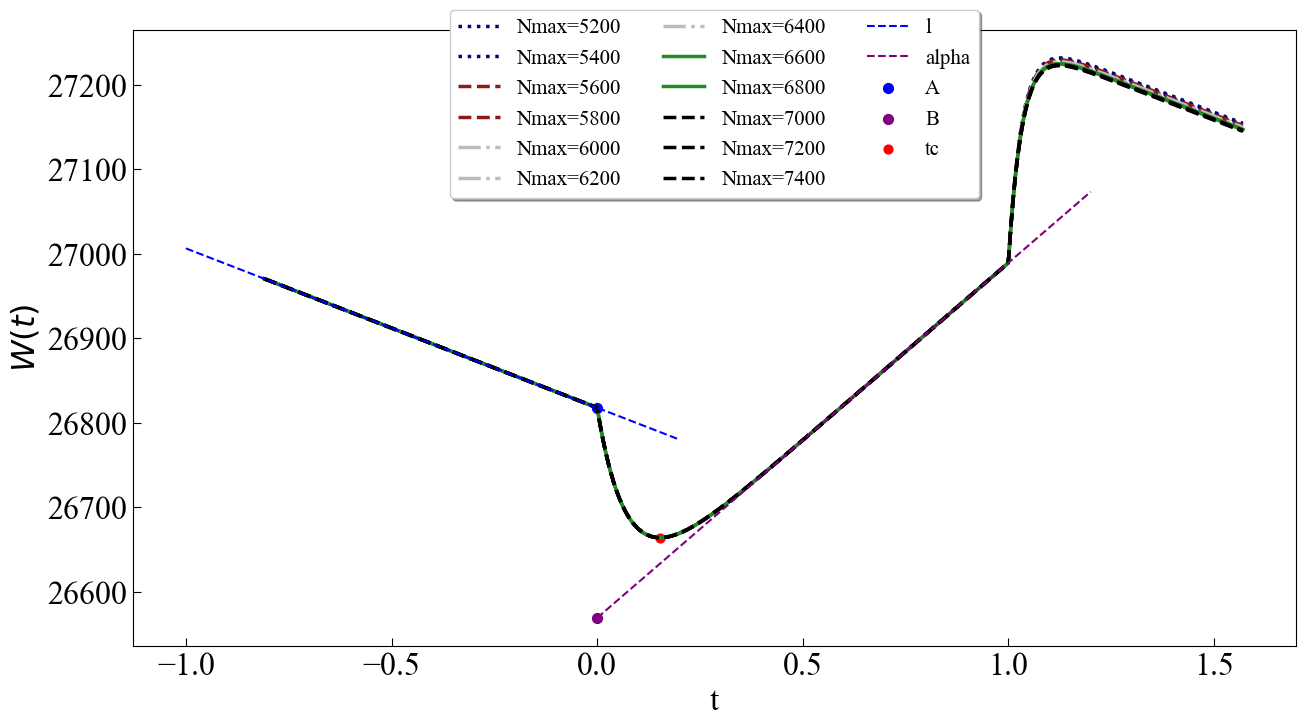

In [8]:
fig=plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.set_ylabel('$W(t)$',fontname="Times New Roman",fontsize=23)
ax1.set_xlabel('t',fontname="Times New Roman",fontsize=23)
ax1.tick_params(axis="y",direction="in", pad=4, length=6,labelsize=23)
ax1.tick_params(axis="x",direction="in", pad=4, length=6,labelsize=23)
N=Nmax

Iteraction = 0

result=np.array([0.0,N,W0,a_1/(t1-t0),a_2/(t1-t0),d_1/(t1-t0),m,l/(t1-t0),A,B,alpha/(t1-t0),inflection_1])

while N<7501:#38000:#34871:
    Nmax=N
    W0=A-N*w
    a_1=-d_1- np.log(alpha/(w*Nmax*d_1+alpha+l))/tc
   
    data=(A, B, alpha, Nmax, a_1, w, l) # Calculation of m_f
    m=scipy.optimize.fsolve(fun_mf,1, args=data) 
   
    d_1=a_1**2*Nmax*m/(a_1*Nmax*m-alpha-l)-a_1 # RE-calculation of d_1
   
    data=(t0,t1,a_1,d_1)
    a_2=scipy.optimize.fsolve(fun_a2,1, args=data) 
   
    y=B+(alpha)*t
    
    inflection_1=np.log((alpha)/(w*Nmax*d_1+alpha+l))/-(d_1+a_1)
    weight=Wfunc(Time,a_1,a_2,d_1,m,Nmax,w,W0,l)
    r = random.random()
    g = random.random()
    b = random.random()
    rgb = (r, g, b)
    lines = [":","--","-.","-","--",":","--","-.","-","--"]
    color_2= ["#000080","#8B1A1A","#BDBDBD","#228B22","#000000","#000080","#8B1A1A","#BDBDBD","#228B22","#000000"]
    
    ax1.plot(Time,weight,linestyle=lines[int((Nmax-5000)/500)],color =color_2[int((Nmax-5000)/500)],linewidth=2.5,label="Nmax="+str(N))#color ="#990000"
   
    a=a_1
    a2=a_2[0]
    d_1=d_1[0]
    m=m[0]
    inflec=inflection_1[0]    
    Iteraction += 1
    result_iter=np.array([Iteraction,N,W0,a/(t1-t0),a2/(t1-t0),d_1/(t1-t0),m,l/(t1-t0),A,B,alpha/(t1-t0),inflec])
    result=np.concatenate((result,result_iter),axis=0)
    N=N+200#+5000

xspace_1=np.linspace(-1, 0.2, num=30)
xspace_2=np.linspace(0, 1.2, num=30)
ax1.plot(xspace_1,Line(xspace_1,-l,A),color="blue", linestyle='--',label="l")
ax1.plot(xspace_2,Line(xspace_2,alpha,B),color="purple", linestyle='--',label="alpha")
ax1.scatter(0,A,color ="blue",s=50, label="A")
ax1.scatter(0,B,color ="purple",s=50, label="B")
ax1.scatter(inflection_1,Wfunc(inflection_1,a_1,a_2,d_1,m,Nmax,w,W0,l),color ="red",s=40, label="tc")
#ax1.legend(loc='best',fontsize=17)
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, fontsize=15, shadow=True)
result=result.reshape(Iteraction+1,len(result_iter))
result=np.round(result, 2)
col_names = ["Iter","N[bees]","W0[g]","a[1/h]","a2[1/h]","d[1/h]","m[g]","l[g/h]","A[g]","B[g]","alpha[g/h]", "Inflec[t]"]
print(tabulate(result, headers=col_names))
